In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from urllib.parse import quote
from selenium.webdriver.common.keys import Keys

In [6]:
driver = webdriver.Chrome('C:\\Users\\Bestc\\Desktop\\빅데이터 지능형 서비스 개발과정(멀티캠퍼스)\\설치프로그램\\Selenium\\chromedriver.exe')
base_url = 'https://search.naver.com/search.naver?where=view&sm=tab_jum&query='
url = base_url + quote('여행')
driver.get(url)
body = driver.find_element_by_tag_name('body')
for i in range(30):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
lis = soup.select('li.bx._svp_item')
len(lis)

51

In [7]:
li = lis[0]
title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text()
content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
date = li.select_one('.sub_time.sub_txt').get_text()
title, content, date

('부산 여행 코스 해운대블루라인파크 해운대 해변열차 스카이캡슐',
 '부산 여행 코스 해운대블루라인파크 해운대 해변열차 스카이캡슐 타고 부산 바다랑 같이 했는데요. 송정역에서 미포역까지 열차를 이용하고 미포에서 청사포까지 스카이캡슐을 탔던 코스입니다. 부산 여행 중에 들렀던...',
 '2021.08.06.')

In [8]:
title_list, content_list, date_list = [], [], []
for i, li in enumerate(lis):
    try:
        adv = li.select_one('a.link_ad').get_text()
        if adv.strip() == '광고':
            continue
    except:
        title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text()
        content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
        date = li.select_one('.sub_time.sub_txt').get_text()

        title_list.append(title)
        content_list.append(content)
        date_list.append(date)
        # print(i)

In [10]:
df = pd.DataFrame({
    'title' : title_list, 'date' : date_list, 'content' : content_list
})
df.date

0     2021.08.06.
1            3일 전
2            3일 전
3     2021.08.13.
4            6일 전
5     2021.07.30.
6     2021.08.14.
7            4일 전
8     2021.08.01.
9     2021.08.12.
10    2021.08.20.
11    2021.08.22.
12    2021.08.16.
13         14시간 전
14    2021.08.21.
15           4일 전
16           7일 전
17    2021.07.30.
18    2021.07.27.
19    2021.08.19.
20    2021.08.10.
21           4일 전
22         15시간 전
23             어제
24    2021.08.15.
25             어제
26    2021.08.23.
27    2021.08.07.
28           6일 전
29    2021.08.20.
30         20시간 전
31    2021.08.10.
32    2021.08.17.
33    2021.08.03.
34           5일 전
35    2021.07.25.
36    2021.07.29.
37           6일 전
38    2021.08.05.
39    2021.08.17.
40           6일 전
41    2021.08.23.
42    2021.08.21.
43    2021.08.22.
44    2021.08.20.
45           7일 전
46           6일 전
47    2021.08.10.
48    2021.08.17.
Name: date, dtype: object

In [47]:
df.date.value_counts()

2021.08.24     5
2021.08.20.    3
2021.08.10.    3
2021.08.26     3
2021.08.30     3
2021.08.17.    3
2021.08.22.    2
2021.08.23.    2
2021.08.27     2
2021.08.21.    2
2021.08.23     2
2021.07.30.    2
2021.08.29     2
2021.08.15.    1
2021.08.03.    1
2021.08.25     1
2021.07.25.    1
2021.08.07.    1
2021.07.29.    1
2021.08.06.    1
2021.08.19.    1
2021.07.27.    1
2021.08.16.    1
2021.08.12.    1
2021.08.01.    1
2021.08.14.    1
2021.08.13.    1
2021.08.05.    1
Name: date, dtype: int64

In [45]:
for i in range(len(df.date)):
    if df.date[i][-4:] == '시간 전':
        df.date[i] = '2021.08.30'
    elif df.date[i] == '1일 전' or df.date[i] == '어제':
        df.date[i] = '2021.08.29'
    elif df.date[i] == '2일 전':
        df.date[i] = '2021.08.28'
    elif df.date[i] == '3일 전':
        df.date[i] = '2021.08.27'
    elif df.date[i] == '4일 전':
        df.date[i] = '2021.08.26'
    elif df.date[i] == '5일 전':
        df.date[i] = '2021.08.25'
    elif df.date[i] == '6일 전':
        df.date[i] = '2021.08.24'
    elif df.date[i] == '7일 전':
        df.date[i] = '2021.08.23'
    else:
        df.date[i] = df.date[i]

In [46]:
df

,title,date,content
0,부산 여행 코스 해운대블루라인파크 해운대 해변열차 스카이캡슐,2021.08.06.,부산 여행 코스 해운대블루라인파크 해운대 해변열차 스카이캡슐 타고 부산 바다랑 같이...
1,제주 여행 코스 초록초록 숲길 산책하는 곶자왈 도립공원,2021.08.27,항상 제주 여행 떠올리면 가장 먼저 눈 앞에 그려지는 것이 바로 에메랄드 빛 푸른바...
2,제주도 여행 핫한 여행지 5곳,2021.08.27,얼마 전 친구들과 다녀왔던 제주도 여행에서는 천지연폭포 같은 전통적인 명소에서 노형...
3,시원했던 제주 여행 원앙폭포와 제주도 핫플레이스,2021.08.13.,제주 여행 시원한 제주도 핫플레이스 뜨거운 더위가 기승을 부리던 지난주에 지인들과 ...
4,제주 서귀포 가볼만한곳 숨은 명소 볼거리 체험 제주도 2박3일 여행코스,2021.08.24,"제주 서귀포 가볼만한곳 숨은 명소 체험 볼거리 제주도 2박3일 여행코스 글, 사진 ..."
5,인천 여행코스 선재도 인천 바다 드라이브 추천,2021.07.30.,인천 여행코스 선재도 인천 바다 드라이브 추천 글&사진: 초록바다 최양훈 // 촬영...
6,거제도 가볼만한곳 거제 여행 카페 마소마레 외,2021.08.14.,거제도 가볼만한곳 거제 카페 마소마레 외 여행 코스 거제 가볼만한곳 따라 여행~ 여...
7,"평창 여행 발왕산 케이블카 스카이워크, 대관령 양떼목장까지",2021.08.26,"평창 여행 발왕산 케이블카 스카이워크, 대관령 양떼목장까지 여름에도 기온이 다른 곳..."
8,제주도 택시투어 제주 관광코스 여유롭게 힐링여행,2021.08.01.,계획 없이 무작정 떠나고 싶을 때 제주도 여행이 좋은 것 같다. 성수기에 찾으면 렌...
9,자연과 함께하는 선덕사 외 2박3일 제주 여행 코스,2021.08.12.,저번주에 가족들과 함께 2박3일 제주 여행 코스를 계획하고 다녀왔습니다. 아이들 방...


In [53]:
df.to_csv('C:\\Workspace\\python\\Data_Science\\dataA\\여행_네이버.txt', index = False)

In [54]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import konlpy
from PIL import Image
from konlpy.tag import Okt
okt = Okt()

In [58]:
with open('C:\\Workspace\\python\\Data_Science\dataA\\여행_네이버.txt', encoding = 'UTF-8')as f:
    text_travel = f.read()
import nltk

In [66]:
from konlpy.tag import Okt
okt = Okt()
tokens = okt.nouns(text_travel)
tokens[:10]

['부산', '여행', '코스', '해운대', '블루라인', '파크', '해운대', '해변', '열차', '스카이']

In [69]:
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)
new_tokens[:10]

['부산', '여행', '코스', '해운대', '블루라인', '파크', '해운대', '해변', '열차', '스카이']

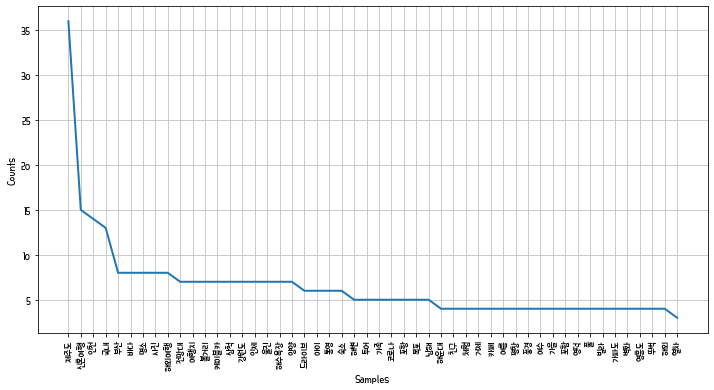

In [87]:
stoptext = '''
    여행 곳 코스 추천 박 때 스카이 것 외 수 핫 글 등 그 처음 생각 인 시작 타고 포 중 시간 워 후 제주 이번 초록 계획
    게시판 전 더 일 지역 날 소식 불 이상 저
'''
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
travel = nltk.Text(new_tokens, name = '여행')
plt.figure(figsize = (12, 6))
travel.plot(50)
plt.show()

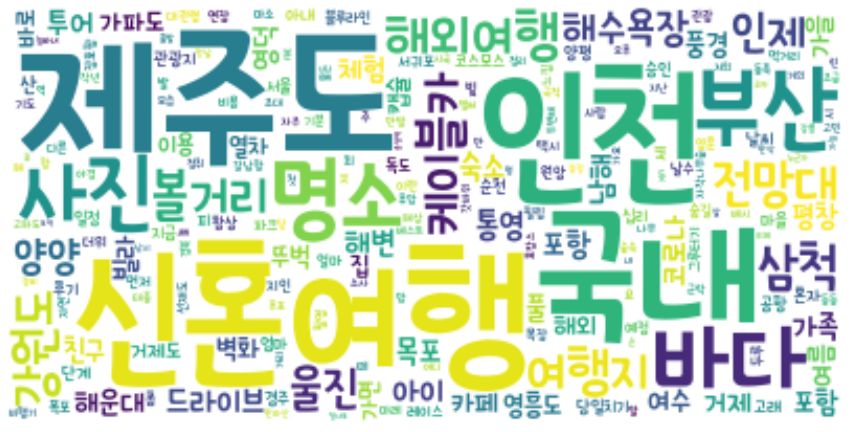

In [90]:
from wordcloud import WordCloud
from PIL import Image
data = travel.vocab().most_common(300)
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

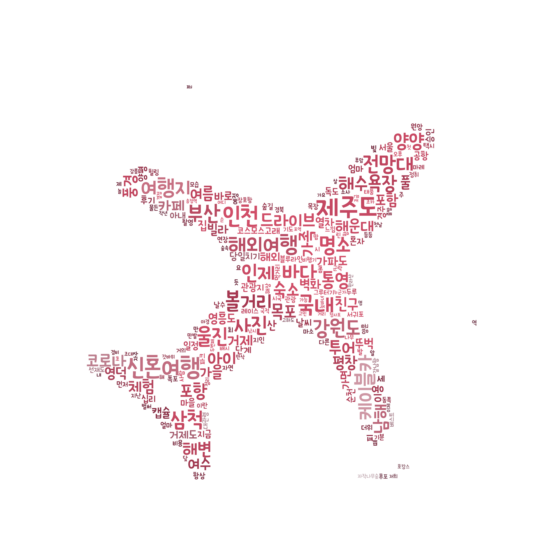

In [116]:
mask = np.array(Image.open('C:\\Workspace\\python\\Data_Science\\dataA\\여행 아이콘.png'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white', mask = mask,
    min_font_size = 10, max_font_size = 300
).generate_from_frequencies(dict(data))
plt.figure(figsize = (10, 10))
plt.imshow(wc.recolor(color_func = image_colors),
           interpolation = 'bilinear')
plt.axis('off')
plt.show()